# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [51]:
# a)
# importando bibliotecas
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [52]:
# criando as variáveis necessárias
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

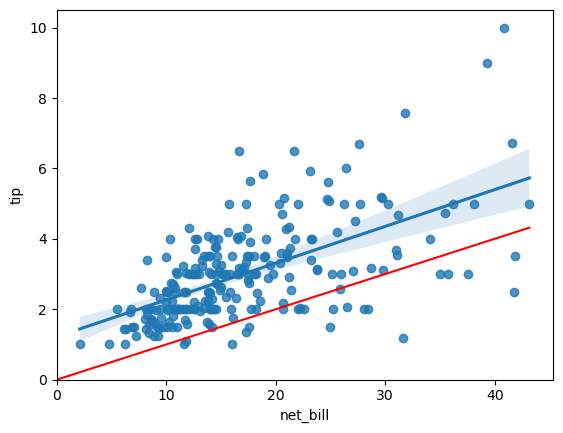

In [53]:
# b)  Reproduzindo o gráfico de dispersão.
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [63]:
# Regressão linear 'tip' e 'net_bill'
print("Regressão linear 'tip' e 'net_bill'")
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

Regressão linear 'tip' e 'net_bill'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           5.02e-23
Time:                        15:06:57   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 4.53285)

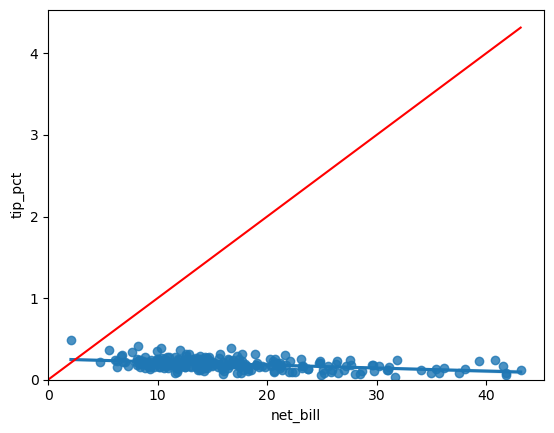

In [55]:
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct']<.5])

x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [64]:
# Regressão linear 'tip_pct' e 'net_bill'
print("Regressão linear 'tip_pct' e 'net_bill'")
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2.summary()

Regressão linear 'tip_pct' e 'net_bill'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           1.52e-06
Time:                        15:07:07   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

### Insight: 
Comparando o coeficiente de determinação (R-quadrado) de ambos os gráficos, podemos analisar que são baixos, ou seja, não explicam muito sobre a variação. Porém, a diferença entre os dois é bastante significativa, sendo o R-quadrado do primeiro gráfico de 0,33 e do segundo de 0,09.

Já comparando outros aspectos, podemos notar que no primeiro gráfico, a gorjeta acompanha o crescimento do valor da conta. E no segundo gráfico, isso não acontece; pelo contrário, a gorjeta diminui conforme a conta aumenta.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [57]:
print("Regressão linear 'tip_pct' e 'net_bill'")
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2.summary()

Regressão linear 'tip_pct' e 'net_bill'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           1.52e-06
Time:                        14:59:38   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
reg2.fittedvalues

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [59]:
reg2.predict(tips)

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [65]:
# Obtenha o valor predito pred para tip_pct (dica, veja o atributo reg.fittedvalues)
tips['pred_tip_pct'] = reg2.predict(tips)
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,pred_tip_pct,pred_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087,1.01
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951,1.66
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684,3.50
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107,3.31
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358,3.61
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.163268,5.92
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,0.150546,2.00
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,0.178264,2.00
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,0.206534,1.75


In [61]:
# Obtenha o valor predito para tip como tip_pct * net_bill
tips['pred_tip'] = tips['tip_pct'] * tips['net_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,pred_tip_pct,pred_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087,1.01
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951,1.66
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684,3.50
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107,3.31
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358,3.61
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.163268,5.92
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,0.150546,2.00
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,0.178264,2.00
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,0.206534,1.75


In [75]:
print(f'R2 Modelo "tip": {reg.rsquared * 100:.2f}%')
print(f'R2 Modelo "tip_pct": {reg2.rsquared * 100:.2f}%')

R2 Modelo "tip": 33.25%
R2 Modelo "tip_pct": 9.13%
